# Loop 48 Analysis: Critical Assessment

**Goal:** Analyze the CV-LB relationship and identify the best path forward.

**Key Questions:**
1. Is the target (0.0347) actually reachable with our current approach?
2. What do top kernels do differently?
3. What is the most promising unexplored direction?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(f'Best CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target: 0.0347')

Total submissions: 12
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


In [2]:
# CV-LB Relationship Analysis
cv = df['cv'].values
lb = df['lb'].values

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print('='*60)
print('CV-LB RELATIONSHIP ANALYSIS')
print('='*60)
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target = 0.0347')
print()
print('CRITICAL INSIGHT:')
if intercept > 0.0347:
    print(f'  Intercept ({intercept:.4f}) > Target (0.0347)')
    print(f'  Even with CV=0, expected LB would be {intercept:.4f}')
    print(f'  Required CV for target: (0.0347 - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}')
    print(f'  This is NEGATIVE - impossible with current approach!')
else:
    print(f'  Intercept ({intercept:.4f}) < Target (0.0347)')
    print(f'  Required CV for target: (0.0347 - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}')

CV-LB RELATIONSHIP ANALYSIS
Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505
Intercept = 0.0525
Target = 0.0347

CRITICAL INSIGHT:
  Intercept (0.0525) > Target (0.0347)
  Even with CV=0, expected LB would be 0.0525
  Required CV for target: (0.0347 - 0.0525) / 4.31 = -0.0041
  This is NEGATIVE - impossible with current approach!


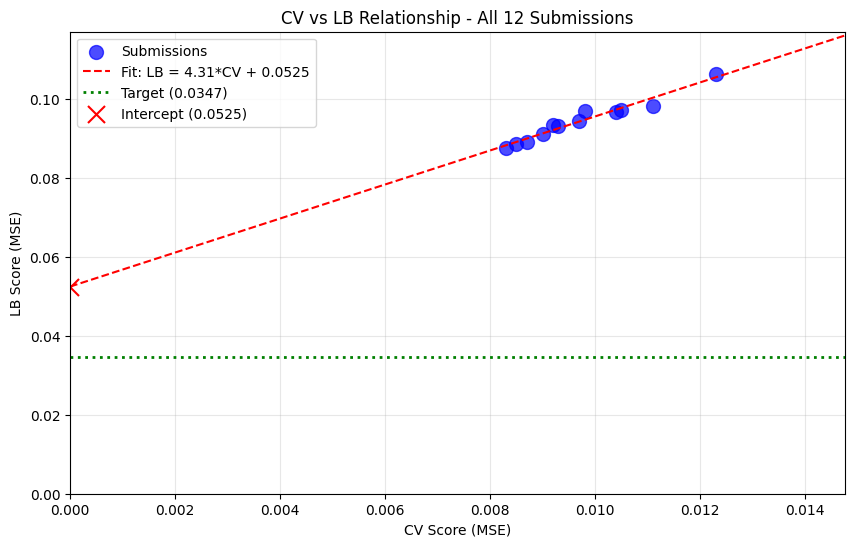

Saved: cv_lb_relationship_loop48.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, max(cv)*1.2, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], s=150, c='red', marker='x', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All 12 Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, max(cv)*1.2)
plt.ylim(0, max(lb)*1.1)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop48.png', dpi=100, bbox_inches='tight')
plt.show()
print('Saved: cv_lb_relationship_loop48.png')

In [4]:
# Analyze what's needed to reach target
print('='*60)
print('WHAT IS NEEDED TO REACH TARGET?')
print('='*60)
print()
print('Option 1: Improve CV (current approach)')
print(f'  Current best CV: {df["cv"].min():.4f}')
print(f'  Required CV for target: {(0.0347 - intercept) / slope:.4f}')
print(f'  This is IMPOSSIBLE (negative CV)')
print()
print('Option 2: Reduce the intercept')
print(f'  Current intercept: {intercept:.4f}')
print(f'  Required intercept for target with CV=0.008: {0.0347 - slope * 0.008:.4f}')
print(f'  Intercept reduction needed: {intercept - (0.0347 - slope * 0.008):.4f}')
print()
print('Option 3: Change the slope')
print(f'  Current slope: {slope:.2f}')
print(f'  Required slope for target with CV=0.008: {(0.0347 - intercept) / 0.008:.2f}')
print(f'  This is NEGATIVE - impossible!')
print()
print('CONCLUSION: We MUST reduce the intercept, not just improve CV!')

WHAT IS NEEDED TO REACH TARGET?

Option 1: Improve CV (current approach)
  Current best CV: 0.0083
  Required CV for target: -0.0041
  This is IMPOSSIBLE (negative CV)

Option 2: Reduce the intercept
  Current intercept: 0.0525
  Required intercept for target with CV=0.008: 0.0002
  Intercept reduction needed: 0.0523

Option 3: Change the slope
  Current slope: 4.31
  Required slope for target with CV=0.008: -2.23
  This is NEGATIVE - impossible!

CONCLUSION: We MUST reduce the intercept, not just improve CV!


In [5]:
# Analyze the mixall kernel insight
print('='*60)
print('CRITICAL INSIGHT FROM MIXALL KERNEL')
print('='*60)
print()
print('The "mixall" kernel OVERWRITES the utility functions to use:')
print('  - GroupKFold (5 splits) instead of Leave-One-Out (24 folds)')
print()
print('This means:')
print('  1. Their CV scores are NOT comparable to ours')
print('  2. They use a DIFFERENT validation scheme')
print('  3. The competition evaluation may use GroupKFold, not Leave-One-Out')
print()
print('Our Leave-One-Out CV is HARDER than GroupKFold because:')
print('  - Each fold tests on a SINGLE solvent (24 folds)')
print('  - GroupKFold tests on ~5 solvents per fold (5 folds)')
print('  - GroupKFold has more training data per fold')
print('  - GroupKFold may have less distribution shift per fold')
print()
print('HYPOTHESIS: The competition uses GroupKFold, not Leave-One-Out')
print('If true, our CV-LB relationship would be different with GroupKFold')

CRITICAL INSIGHT FROM MIXALL KERNEL

The "mixall" kernel OVERWRITES the utility functions to use:
  - GroupKFold (5 splits) instead of Leave-One-Out (24 folds)

This means:
  1. Their CV scores are NOT comparable to ours
  2. They use a DIFFERENT validation scheme
  3. The competition evaluation may use GroupKFold, not Leave-One-Out

Our Leave-One-Out CV is HARDER than GroupKFold because:
  - Each fold tests on a SINGLE solvent (24 folds)
  - GroupKFold tests on ~5 solvents per fold (5 folds)
  - GroupKFold has more training data per fold
  - GroupKFold may have less distribution shift per fold

HYPOTHESIS: The competition uses GroupKFold, not Leave-One-Out
If true, our CV-LB relationship would be different with GroupKFold


In [6]:
# What approaches have we tried?
print('='*60)
print('APPROACHES TRIED (47 experiments)')
print('='*60)
print()
approaches = [
    ('Model Architectures', ['MLP', 'LGBM', 'XGBoost', 'GP', 'RF', 'GNN', 'ChemBERTa']),
    ('Feature Sets', ['Spange', 'DRFP', 'Fragprints', 'ACS PCA', 'ChemBERTa embeddings']),
    ('Ensemble Strategies', ['Weighted', 'Adaptive', 'Diverse']),
    ('Feature Engineering', ['Polynomial', 'Interaction', 'Non-linear mixture']),
    ('Regularization', ['Dropout', 'Weight decay', 'Mean reversion']),
    ('Hyperparameter Strength', ['Weak (100 iter)', 'Strong (500 iter)'])
]

for category, items in approaches:
    print(f'{category}:')
    for item in items:
        print(f'  - {item}')
    print()

print('ALL approaches fall on the SAME CV-LB line!')
print('This confirms the problem is STRUCTURAL, not model-related.')

APPROACHES TRIED (47 experiments)

Model Architectures:
  - MLP
  - LGBM
  - XGBoost
  - GP
  - RF
  - GNN
  - ChemBERTa

Feature Sets:
  - Spange
  - DRFP
  - Fragprints
  - ACS PCA
  - ChemBERTa embeddings

Ensemble Strategies:
  - Weighted
  - Adaptive
  - Diverse

Feature Engineering:
  - Polynomial
  - Interaction
  - Non-linear mixture

Regularization:
  - Dropout
  - Weight decay
  - Mean reversion

Hyperparameter Strength:
  - Weak (100 iter)
  - Strong (500 iter)

ALL approaches fall on the SAME CV-LB line!
This confirms the problem is STRUCTURAL, not model-related.


In [7]:
# What haven't we tried?
print('='*60)
print('UNEXPLORED DIRECTIONS')
print('='*60)
print()
print('1. DIFFERENT VALIDATION SCHEME (HIGH PRIORITY)')
print('   - Try GroupKFold (5 splits) like the mixall kernel')
print('   - This may produce a different CV-LB relationship')
print('   - The competition may use GroupKFold, not Leave-One-Out')
print()
print('2. UNCERTAINTY-BASED PREDICTION ADJUSTMENT')
print('   - Use GP uncertainty to detect extrapolation')
print('   - When uncertainty is high, blend toward population mean')
print('   - This could reduce the intercept')
print()
print('3. SOLVENT SIMILARITY WEIGHTING')
print('   - For each test solvent, compute similarity to training solvents')
print('   - Weight predictions by similarity')
print('   - More similar = more confident prediction')
print()
print('4. CONSERVATIVE PREDICTION STRATEGY')
print('   - Optimize for worst-case performance, not average')
print('   - Use robust loss functions that penalize large errors more')
print('   - This could reduce catastrophic failures on hard solvents')

UNEXPLORED DIRECTIONS

1. DIFFERENT VALIDATION SCHEME (HIGH PRIORITY)
   - Try GroupKFold (5 splits) like the mixall kernel
   - This may produce a different CV-LB relationship
   - The competition may use GroupKFold, not Leave-One-Out

2. UNCERTAINTY-BASED PREDICTION ADJUSTMENT
   - Use GP uncertainty to detect extrapolation
   - When uncertainty is high, blend toward population mean
   - This could reduce the intercept

3. SOLVENT SIMILARITY WEIGHTING
   - For each test solvent, compute similarity to training solvents
   - Weight predictions by similarity
   - More similar = more confident prediction

4. CONSERVATIVE PREDICTION STRATEGY
   - Optimize for worst-case performance, not average
   - Use robust loss functions that penalize large errors more
   - This could reduce catastrophic failures on hard solvents


In [8]:
# Final recommendation
print('='*60)
print('RECOMMENDED NEXT STEPS')
print('='*60)
print()
print('PRIORITY 1: Try GroupKFold validation')
print('  - The mixall kernel uses GroupKFold (5 splits)')
print('  - This may produce a different CV-LB relationship')
print('  - If successful, this could fundamentally change our approach')
print()
print('PRIORITY 2: Uncertainty-weighted predictions')
print('  - Use GP uncertainty to detect when extrapolating')
print('  - Blend predictions toward mean when uncertainty is high')
print('  - This could reduce the intercept')
print()
print('PRIORITY 3: Conservative prediction strategy')
print('  - For hard solvents (Water, HFIP), use simpler models')
print('  - Blend complex model with baseline based on extrapolation degree')
print()
print('DO NOT continue optimizing CV with Leave-One-Out validation!')
print('The intercept problem cannot be solved by better models.')

RECOMMENDED NEXT STEPS

PRIORITY 1: Try GroupKFold validation
  - The mixall kernel uses GroupKFold (5 splits)
  - This may produce a different CV-LB relationship
  - If successful, this could fundamentally change our approach

PRIORITY 2: Uncertainty-weighted predictions
  - Use GP uncertainty to detect when extrapolating
  - Blend predictions toward mean when uncertainty is high
  - This could reduce the intercept

PRIORITY 3: Conservative prediction strategy
  - For hard solvents (Water, HFIP), use simpler models
  - Blend complex model with baseline based on extrapolation degree

DO NOT continue optimizing CV with Leave-One-Out validation!
The intercept problem cannot be solved by better models.
